### 1. Loading the dataset

In [95]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/angel/Downloads/search_export_2024_04_18_160715/shortage_report_export.csv')

data

,Report ID,Drug Identification Number,Report Type,Brand name,Company Name,Common or Proper name,Ingredients,Strength(s),Packaging size,Route of administration,Shortage status,Dosage form(s),Anticipated start date,Actual start date,Estimated end date,Actual end date,Reason,Date Created,Date Updated,Tier 3
0,179915,828602,Shortage,0.4% LIDOCAINE HYDROCHLORIDE AND 5% DEXTROSE I...,BAXTER CORPORATION,0.4% LIDOCAINE HYDROCHLORIDE AND 5% DEXTROSE I...,DEXTROSE; LIDOCAINE HYDROCHLORIDE,50MG; 4MG,500mL bag,INTRAVENOUS; INTRAVENOUS,Resolved,SOLUTION; SOLUTION,2023-01-09,2023-01-09,2023-02-13,2023-02-13,Demand increase for the drug.,2023-01-05,2023-02-14,No
1,181393,786160,Shortage,"0.9% SODIUM CHLORIDE IRRIGATION, USP",BAXTER CORPORATION,"0.9% SODIUM CHLORIDE IRRIGATION, USP",SODIUM CHLORIDE,900MG,500 mL,IRRIGATION; IRRIGATION,Resolved,SOLUTION,2023-01-18,2023-01-18,2023-03-30,2023-03-30,Disruption of the manufacture of the drug.,2023-01-18,2023-03-31,No
2,181191,786160,Shortage,"0.9% SODIUM CHLORIDE IRRIGATION, USP",BAXTER CORPORATION,"0.9% SODIUM CHLORIDE IRRIGATION, USP",SODIUM CHLORIDE,900MG,1000ML,IRRIGATION; IRRIGATION,Resolved,SOLUTION,2023-01-16,2023-01-16,2023-03-30,2023-03-30,Disruption of the manufacture of the drug.,2023-01-16,2023-03-31,No
3,200398,38903,Shortage,5% DEXTROSE AND 0.45% SODIUM CHLORIDE,ICU MEDICAL CANADA INC,Dextrose and Sodium Chloride Injection USP,SODIUM CHLORIDE; DEXTROSE,4.5MG; 50MG,1000 mL,INTRAVENOUS; INTRAVENOUS,Avoided shortage,SOLUTION,2023-09-18,NaN,2023-10-30,2023-09-06,Disruption of the manufacture of the drug.,2023-07-28,2023-09-06,No
4,197756,60348,Shortage,"5% DEXTROSE INJECTION, USP",BAXTER CORPORATION,"5% DEXTROSE INJECTION, USP",DEXTROSE,5G,25 mL - JB0080,INTRAVENOUS; INTRAVENOUS,Resolved,SOLUTION,2023-07-06,2023-07-06,2023-07-28,2023-07-28,Disruption of the manufacture of the drug.,2023-07-06,2023-07-31,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,184552,2132702,Shortage,ZOLOFT,UPJOHN CANADA ULC,ZOLFT,SERTRALINE,25MG,100,ORAL; ORAL,Resolved,CAPSULE,NaN,2023-02-07,2023-03-14,2023-03-16,Disruption of the manufacture of the drug.,2023-02-14,2023-03-20,No
3125,191728,1962817,Shortage,ZOLOFT,UPJOHN CANADA ULC,ZOLOFT,SERTRALINE,50MG,250,ORAL; ORAL,Resolved,CAPSULE,2023-05-08,NaN,2023-07-25,2023-07-24,Disruption of the manufacture of the drug.,2023-05-05,2023-08-03,No
3126,193014,2132702,Shortage,ZOLOFT,UPJOHN CANADA ULC,ZOLOFT,SERTRALINE,25MG,100,ORAL; ORAL,Resolved,CAPSULE,2023-06-05,2023-06-12,2023-07-25,2023-07-24,Disruption of the manufacture of the drug.,2023-05-25,2023-08-03,No
3127,196208,886157,Shortage,ZOVIRAX,GLAXOSMITHKLINE INC,Acyclovir Oral Suspension,ACYCLOVIR,200MG,475ML,ORAL; ORAL,Actual shortage,SUSPENSION,NaN,2023-06-22,NaN,NaN,Shortage of an active ingredient.,2023-06-23,2024-04-01,No


In [96]:
# Display the column names
print(data.columns)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values 
print(data.isnull().sum())

# Summary statistics
print(data.describe())

Index(['Report ID', 'Drug Identification Number', 'Report Type', 'Brand name',
       'Company Name', 'Common or Proper name', 'Ingredients', 'Strength(s)',
       'Packaging size', 'Route of administration', 'Shortage status',
       'Dosage form(s)', 'Anticipated start date', 'Actual start date',
       'Estimated end date', 'Actual end date', 'Reason', 'Date Created',
       'Date Updated', 'Tier 3'],
      dtype='object')
   Report ID  Drug Identification Number Report Type  \
0     179915                      828602    Shortage   
1     181393                      786160    Shortage   
2     181191                      786160    Shortage   
3     200398                       38903    Shortage   
4     197756                       60348    Shortage   

                                          Brand name            Company Name  \
0  0.4% LIDOCAINE HYDROCHLORIDE AND 5% DEXTROSE I...      BAXTER CORPORATION   
1               0.9% SODIUM CHLORIDE IRRIGATION, USP      BAXTER CORPORAT

### 4. Exploratory Data Analysis

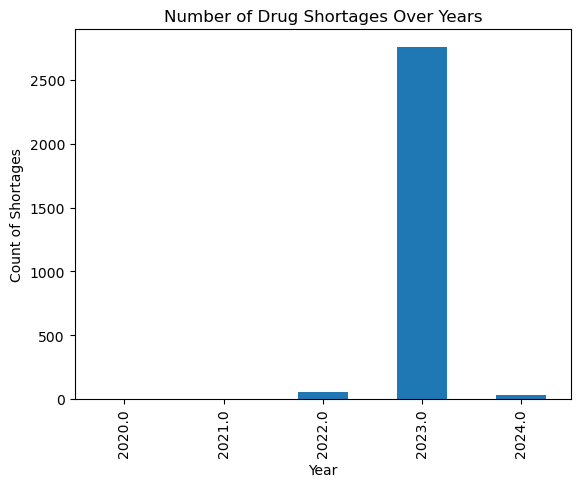

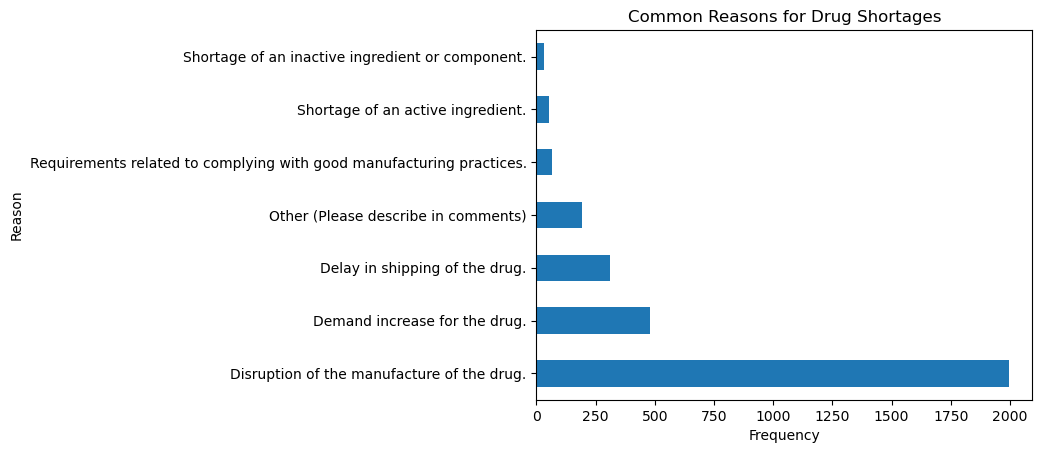

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Actual start date' to datetime format
data['Actual start date'] = pd.to_datetime(data['Actual start date'], errors='coerce')

# Plotting the number of shortages over time
data['Actual start date'].groupby(data['Actual start date'].dt.year).count().plot(kind='bar')
plt.title('Number of Drug Shortages Over Years')
plt.xlabel('Year')
plt.ylabel('Count of Shortages')
plt.show()

# Investigating the most common reasons for shortages
data['Reason'].value_counts().plot(kind='barh')
plt.title('Common Reasons for Drug Shortages')
plt.xlabel('Frequency')
plt.show()

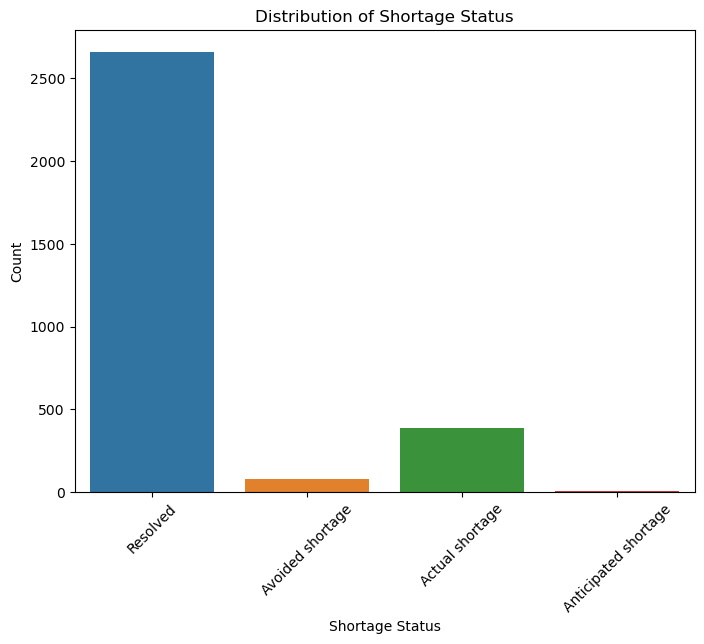

In [98]:
import seaborn as sns

# Distribution of Shortage Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Shortage status', data=data)
plt.title('Distribution of Shortage Status')
plt.xlabel('Shortage Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

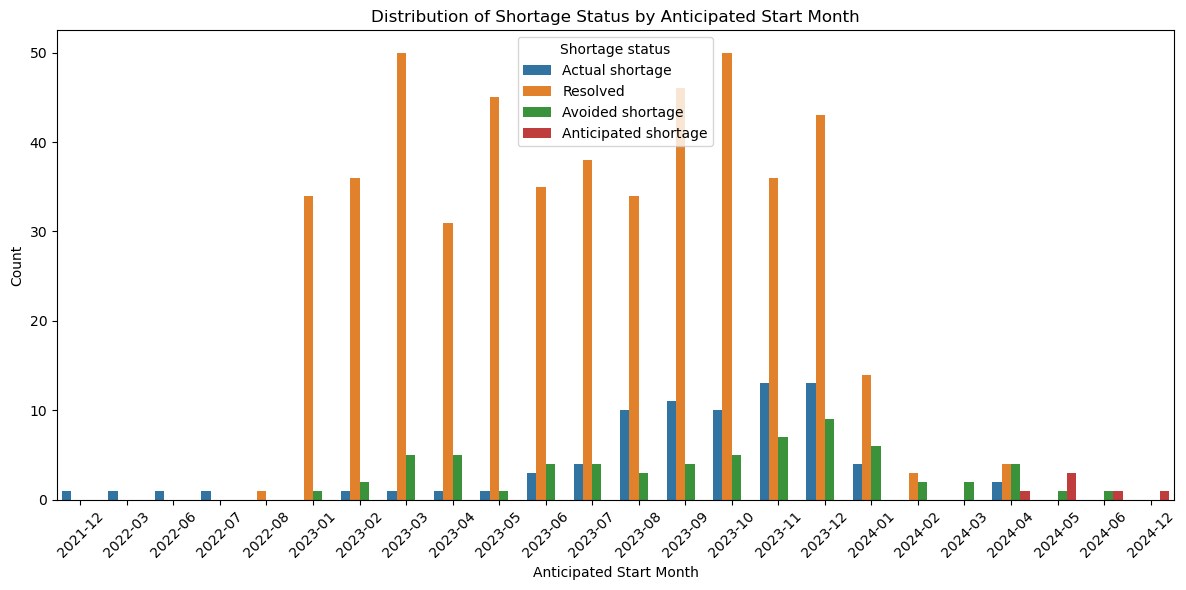

In [99]:
# Ensure 'Anticipated start date' is in datetime format
data['Anticipated start date'] = pd.to_datetime(data['Anticipated start date'], errors='coerce')

# Convert 'Anticipated start date' to month
data['Anticipated start month'] = data['Anticipated start date'].dt.to_period('M')

# Group data by 'Anticipated start month' and 'Shortage status', and count occurrences
count_data = data.groupby(['Anticipated start month', 'Shortage status']).size().reset_index(name='Count')

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot for 'Shortage status' by 'Anticipated start month'
sns.barplot(x='Anticipated start month', y='Count', hue='Shortage status', data=count_data)

# Set plot labels and title
plt.xlabel('Anticipated Start Month')
plt.ylabel('Count')
plt.title('Distribution of Shortage Status by Anticipated Start Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

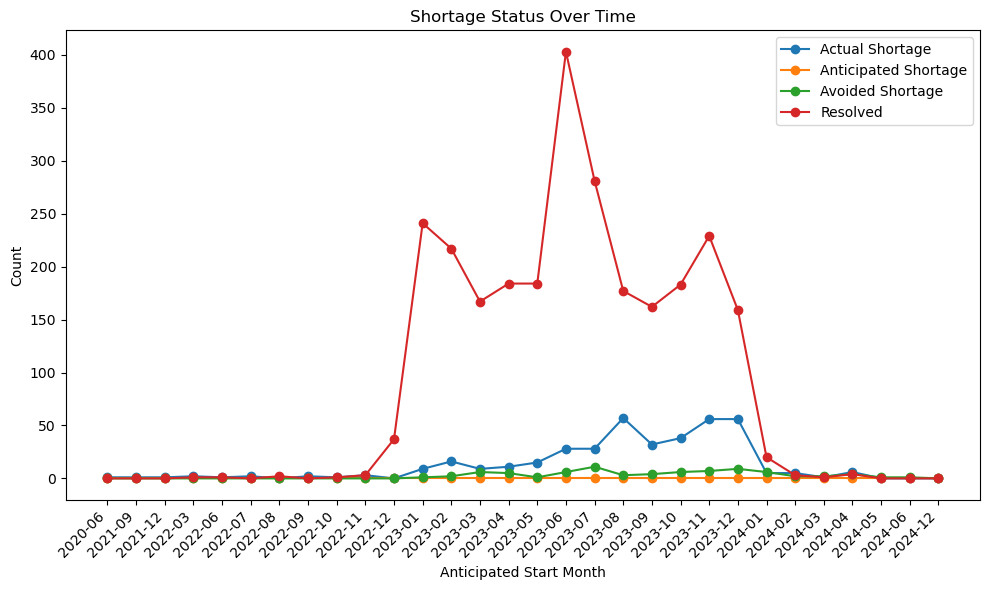

In [100]:
import matplotlib.pyplot as plt

# Define the data
anticipated_start_month = ['2020-06', '2021-09', '2021-12', '2022-03', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-12']
actual_shortage = [1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0.0, 2.0, 1.0, 3.0, 0.0, 9.0, 16.0, 9.0, 11.0, 15.0, 28.0, 28.0, 57.0, 32.0, 38.0, 56.0, 56.0, 5.0, 5.0, 1.0, 6.0, 0.0, 0.0, 0.0]
anticipated_shortage = [0.0] * len(anticipated_start_month)  # Creating a list of zeros with the same length
avoided_shortage = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 6.0, 5.0, 1.0, 6.0, 11.0, 3.0, 4.0, 6.0, 7.0, 9.0, 6.0, 2.0, 2.0, 4.0, 1.0, 1.0, 0.0]
resolved = [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 3.0, 37.0, 241.0, 217.0, 167.0, 184.0, 184.0, 403.0, 281.0, 177.0, 162.0, 183.0, 229.0, 159.0, 20.0, 3.0, 1.0, 4.0, 0.0, 0.0, 0.0]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(anticipated_start_month, actual_shortage, marker='o', label='Actual Shortage')
plt.plot(anticipated_start_month, anticipated_shortage, marker='o', label='Anticipated Shortage')
plt.plot(anticipated_start_month, avoided_shortage, marker='o', label='Avoided Shortage')
plt.plot(anticipated_start_month, resolved, marker='o', label='Resolved')

# Set the title and labels
plt.title('Shortage Status Over Time')
plt.xlabel('Anticipated Start Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Report Type
Shortage    3129
Name: count, dtype: int64
Brand name
APO-ARIPIPRAZOLE                                         19
FOQUEST                                                  19
SANDOZ CANDESARTAN                                       15
SANDOZ PREGABALIN                                        15
TEVA-PROPRANOLOL                                         14
                                                         ..
LEUCOVORIN CALCIUM INJECTION                              1
LIDOCAINE HYDROCHLORIDE AND EPINEPHRINE INJECTION USP     1
LIDOCAINE HYDROCHLORIDE INJECTION                         1
LIPITOR                                                   1
ZYMAR                                                     1
Name: count, Length: 1390, dtype: int64
Company Name
APOTEX INC                                       512
TEVA CANADA LIMITED                              483
SANDOZ CANADA INCORPORATED                       387
AURO PHARMA INC                                  125
PFIZER CA

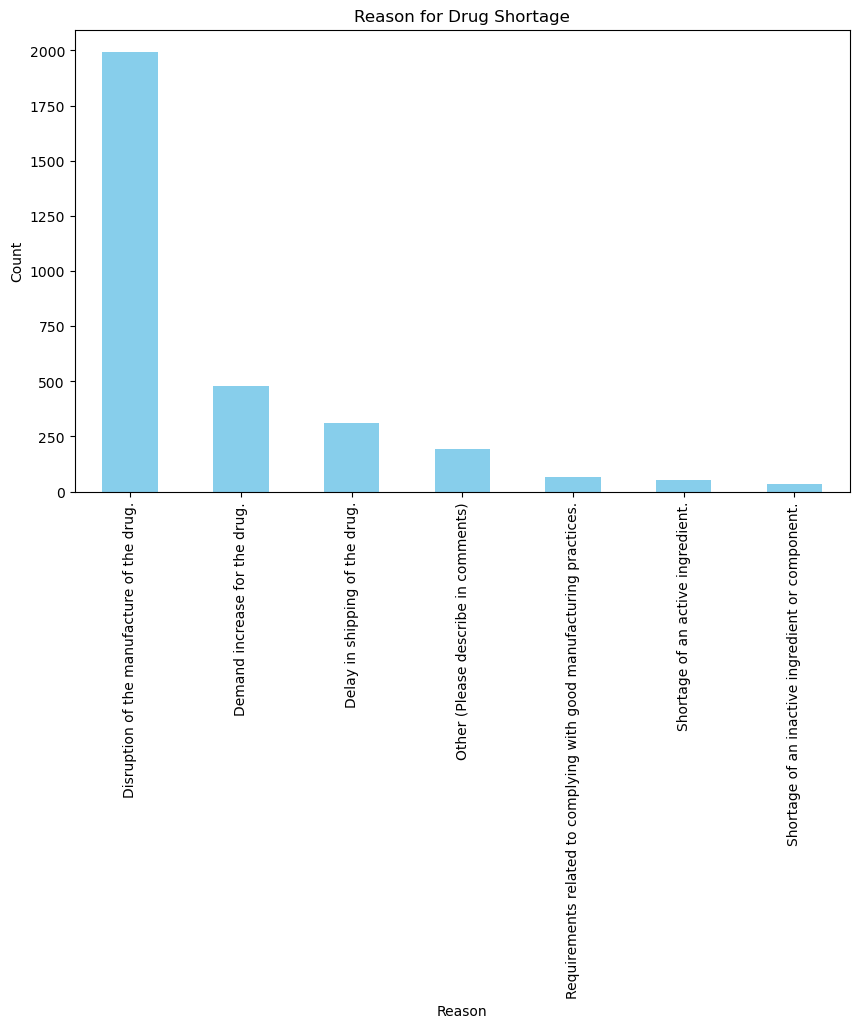

Chi-square statistic: 0.0
P-value: 1.0


In [101]:
categorical_columns = ['Report Type', 'Brand name', 'Company Name', 'Reason']

# Frequency table for each categorical variable
for column in categorical_columns:
    print(data[column].value_counts())

# Bar plot for a specific categorical variable
plt.figure(figsize=(10, 6))
data['Reason'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Reason for Drug Shortage')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

# Chi-square test for independence between two categorical variables
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Report Type'], data['Reason'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

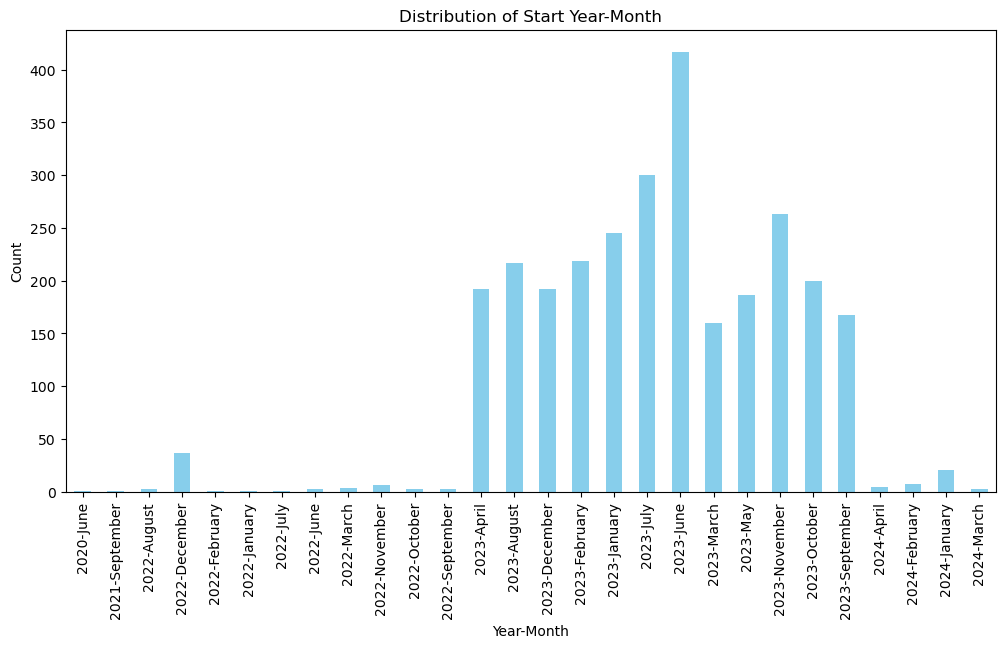

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

data['Actual start date'] = pd.to_datetime(data['Actual start date'])  # Convert to datetime format
data['Start Year-Month'] = data['Actual start date'].dt.strftime('%Y-%B')  # Extract year and month names

# Histogram for the "Actual Start Date" in months
plt.figure(figsize=(12, 6))
data['Start Year-Month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Start Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

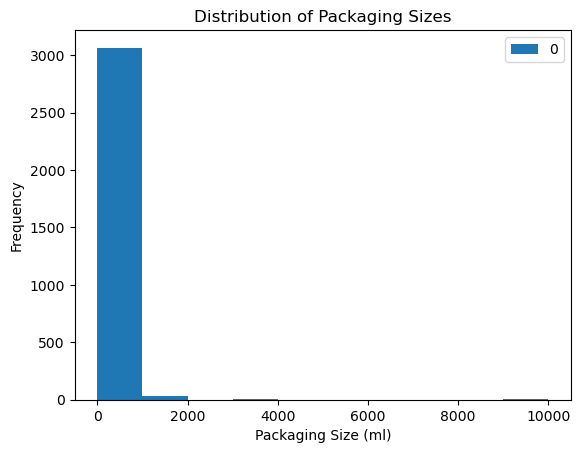

<Figure size 1200x600 with 0 Axes>

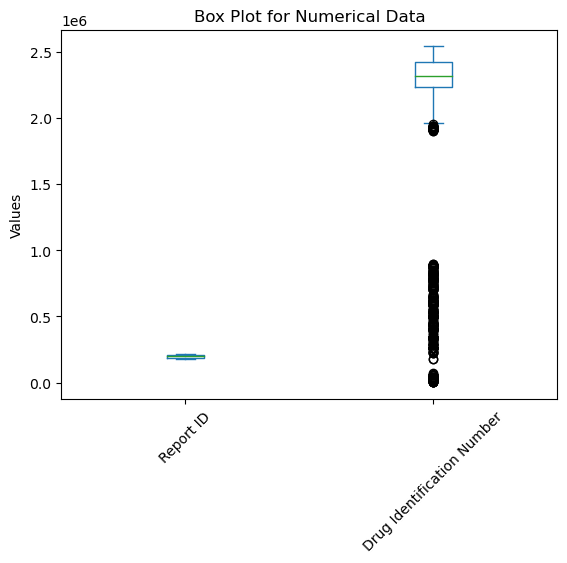

In [103]:
# Histogram for numerical data distribution
data['Packaging size'].dropna().astype(str).str.extract('(\d+)').astype(float).plot.hist(title='Distribution of Packaging Sizes')
plt.xlabel('Packaging Size (ml)')
plt.ylabel('Frequency')
plt.show()

# Box plot for visualizing outliers in numerical columns
plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility
data.select_dtypes(include=['float64', 'int64']).plot.box()
plt.title('Box Plot for Numerical Data')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()


### 3. Preprocessing and Feature Engineering

In [104]:
# Preprocessing
date_columns = ['Anticipated start date', 'Actual start date', 'Estimated end date', 'Actual end date', 'Date Created', 'Date Updated']
for date_column in date_columns:
    data[date_column] = pd.to_datetime(data[date_column], errors='coerce')

data['Ingredients'] = data['Ingredients'].fillna('Unknown')
data['Brand name'] = data['Brand name'].str.strip().str.lower()
data['Company Name'] = data['Company Name'].str.strip().str.lower()

# Fill in missing dates 
data['Actual start date'].fillna(data['Anticipated start date'], inplace=True)
data['Estimated end date'].fillna(data['Actual start date'] + median_duration, inplace=True)
data['Actual end date'].fillna(data['Actual start date'] + median_duration, inplace=True)
data['Anticipated start date'].fillna(data['Actual start date'], inplace=True)

# Generate derived date columns
data['Anticipated start month'] = data['Anticipated start date'].dt.to_period('M')
data['Start Year-Month'] = data['Actual start date'].dt.strftime('%Y-%B')

# Verify the changes
print(data[['Anticipated start date', 'Actual start date']].head())
print(data.isnull().sum())  # To see if there are any remaining null values in these columns

# Simplified usage of describe without datetime_is_numeric
print(data.describe(include='all'))  # This will still provide summaries for datetime by default

# Showing non-null counts and data types
print(data.info())

  Anticipated start date Actual start date
0             2023-01-09        2023-01-09
1             2023-01-18        2023-01-18
2             2023-01-16        2023-01-16
3             2023-09-18        2023-09-18
4             2023-07-06        2023-07-06
Report ID                      0
Drug Identification Number     0
Report Type                    0
Brand name                     0
Company Name                   0
Common or Proper name          0
Ingredients                    0
Strength(s)                    0
Packaging size                10
Route of administration        0
Shortage status                0
Dosage form(s)                 0
Anticipated start date         0
Actual start date              0
Estimated end date             0
Actual end date                0
Reason                         0
Date Created                   0
Date Updated                   0
Tier 3                         0
Anticipated start month        0
Start Year-Month               0
dtype: int64
   

In [105]:
# One-hot encoding
categorical_columns = ['Report Type', 'Brand name', 'Company Name', 'Common or Proper name',
                       'Ingredients', 'Strength(s)', 'Packaging size', 'Route of administration', 
                       'Dosage form(s)', 'Reason', 'Tier 3']

# Perform one-hot encoding using get_dummies()
one_hot_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print(one_hot_encoded.head())

   Report ID  Drug Identification Number   Shortage status  \
0     179915                      828602          Resolved   
1     181393                      786160          Resolved   
2     181191                      786160          Resolved   
3     200398                       38903  Avoided shortage   
4     197756                       60348          Resolved   

  Anticipated start date Actual start date Estimated end date Actual end date  \
0             2023-01-09        2023-01-09         2023-02-13      2023-02-13   
1             2023-01-18        2023-01-18         2023-03-30      2023-03-30   
2             2023-01-16        2023-01-16         2023-03-30      2023-03-30   
3             2023-09-18        2023-09-18         2023-10-30      2023-09-06   
4             2023-07-06        2023-07-06         2023-07-28      2023-07-28   

  Date Created Date Updated Anticipated start month  ...  \
0   2023-01-05   2023-02-14                 2023-01  ...   
1   2023-01-18   202

In [106]:
# Extract day of the week, month, and year
data['Day of Week'] = data['Date Created'].dt.dayofweek
data['Month'] = data['Date Created'].dt.month
data['Year'] = data['Date Created'].dt.year

# Create a binary feature indicating whether the date falls on a weekend
data['Weekend'] = data['Date Created'].dt.dayofweek.isin([5, 6]).astype(int)

one_hot_encoded

,Report ID,Drug Identification Number,Shortage status,Anticipated start date,Actual start date,Estimated end date,Actual end date,Date Created,Date Updated,Anticipated start month,...,Dosage form(s)_TABLET; KIT,Dosage form(s)_TABLET; TABLET,"Dosage form(s)_VAGINAL TABLET, EFFERVESCENT",Reason_Demand increase for the drug.,Reason_Disruption of the manufacture of the drug.,Reason_Other (Please describe in comments),Reason_Requirements related to complying with good manufacturing practices.,Reason_Shortage of an active ingredient.,Reason_Shortage of an inactive ingredient or component.,Tier 3_Yes
0,179915,828602,Resolved,2023-01-09,2023-01-09,2023-02-13,2023-02-13,2023-01-05,2023-02-14,2023-01,...,False,False,False,True,False,False,False,False,False,False
1,181393,786160,Resolved,2023-01-18,2023-01-18,2023-03-30,2023-03-30,2023-01-18,2023-03-31,2023-01,...,False,False,False,False,True,False,False,False,False,False
2,181191,786160,Resolved,2023-01-16,2023-01-16,2023-03-30,2023-03-30,2023-01-16,2023-03-31,2023-01,...,False,False,False,False,True,False,False,False,False,False
3,200398,38903,Avoided shortage,2023-09-18,2023-09-18,2023-10-30,2023-09-06,2023-07-28,2023-09-06,2023-09,...,False,False,False,False,True,False,False,False,False,False
4,197756,60348,Resolved,2023-07-06,2023-07-06,2023-07-28,2023-07-28,2023-07-06,2023-07-31,2023-07,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,184552,2132702,Resolved,2023-02-07,2023-02-07,2023-03-14,2023-03-16,2023-02-14,2023-03-20,2023-02,...,False,False,False,False,True,False,False,False,False,False
3125,191728,1962817,Resolved,2023-05-08,2023-05-08,2023-07-25,2023-07-24,2023-05-05,2023-08-03,2023-05,...,False,False,False,False,True,False,False,False,False,False
3126,193014,2132702,Resolved,2023-06-05,2023-06-12,2023-07-25,2023-07-24,2023-05-25,2023-08-03,2023-06,...,False,False,False,False,True,False,False,False,False,False
3127,196208,886157,Actual shortage,2023-06-22,2023-06-22,2023-08-03,2023-08-03,2023-06-23,2024-04-01,2023-06,...,False,False,False,False,False,False,False,True,False,False


In [107]:
import pandas as pd

# List of date columns you want to convert and manipulate
date_columns = ['Anticipated start date', 'Actual start date', 'Estimated end date', 'Actual end date', 'Date Created', 'Date Updated']

# Convert columns to datetime and extract year, month, day if they exist in the DataFrame
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col])
        data[col + ' Year'] = data[col].dt.year
        data[col + ' Month'] = data[col].dt.month
        data[col + ' Day'] = data[col].dt.day
    else:
        print(f"Column {col} not found in DataFrame.")

# Drop the original date columns 
data.drop([col for col in date_columns if col in data.columns], axis=1, inplace=True)

# Check for any columns with period types and convert them if they exist
for col in data.columns:
    if pd.api.types.is_period_dtype(data[col]):
        data[col] = data[col].apply(lambda x: x.ordinal if x is not pd.NaT else -1)

# Creating the 'Historical Shortage' feature
frequent_shortage_drugs = [
    'PREGABALIN', 'ROSUVASTATIN', 'methylphenidate hydrochloride Controlled Release Capsules', 
    'ATORVASTATIN', 'CANDESARTAN', 'OLANZAPINE', 'ARIPIPRAZOLE', 'METHYLPHENIDATE', 
    'MONTELUKAST', 'RISPERIDONE'
]
data['Historical Shortage'] = data['Common or Proper name'].apply(lambda x: 1 if x in frequent_shortage_drugs else 0)

# Now, to view the new 'Historical Shortage' feature along with a related feature:
print(data[['Common or Proper name', 'Historical Shortage']].head())

                               Common or Proper name  Historical Shortage
0  0.4% LIDOCAINE HYDROCHLORIDE AND 5% DEXTROSE I...                    0
1               0.9% SODIUM CHLORIDE IRRIGATION, USP                    0
2               0.9% SODIUM CHLORIDE IRRIGATION, USP                    0
3         Dextrose and Sodium Chloride Injection USP                    0
4                         5% DEXTROSE INJECTION, USP                    0


### 4. Training the Model

In [108]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Checking the minimum number of samples per class
min_samples = y_train.value_counts().min()
k_neighbors = min(5, min_samples - 1) 

# Create a pipeline that first applies SMOTE then fits a RandomForest model
# Adjusting SMOTE to handle very small classes
if k_neighbors > 0:
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
else:
    smote = SMOTE(random_state=42)

pipeline = make_pipeline(smote, RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
simple_predictions = pipeline.predict(X_test)
print("Simple Random Forest Classification Report after SMOTE:")
print(classification_report(y_test, simple_predictions, zero_division=0))

# Feature importance 
importances = pipeline.named_steps['randomforestclassifier'].feature_importances_
feature_names = X.columns
feature_imports = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_imports.head(10))

# Cross-validation for the simple model
cv_scores = cross_val_score(simple_model, X, y, cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")

Simple Random Forest Classification Report after SMOTE:
                      precision    recall  f1-score   support

     Actual shortage       0.81      0.65      0.72        89
Anticipated shortage       0.00      0.00      0.00         1
    Avoided shortage       0.50      0.56      0.53        18
            Resolved       0.94      0.96      0.95       675

            accuracy                           0.92       783
           macro avg       0.56      0.54      0.55       783
        weighted avg       0.92      0.92      0.92       783

                                                Feature  Importance
2                               Anticipated start month    0.079529
29                                    Date Updated Year    0.040088
14                          Anticipated start date Year    0.035702
20                              Estimated end date Year    0.030344
1                            Drug Identification Number    0.029749
5018  Reason_Disruption of the manufa

#### Model Evaluation on Training Set

Drug Shortage Canada is the leading website used in reporting and displaying current and previous drug shortages. When reporting a shortage of medication it is classified into 4 categories which are: Actual Shortage, Anticipated Shortage, Avoided Shortage, and Resolved. By performing metric analyzation we can determine if our model performs well in our goal of predicting drug shortages. 

**Simple Random Forest Classification Report**

1. Actual Shortage:
- Precision: 0.81 - This means that when this model predicts an actual drug shortage, it is correct 81% of the time.Having a high precision rating is important in the healthcare industry as this ensures that healthcare providers and supply chain managers are alerted to genuine and "actual" shorrages, allowing them to prepare and implement contingency plans effectively. 
- Recall: 0.65 - Higher recall rate means fewer actual shortages will go unnoticed, meaning reduced risk of medication unavailability for patients. 
- F1-Score: 0.72 - This is the balance between precision and recall, and with a rating of 72% is commendable. This ensures that more actual shortages are detected while mainintain high accuracy in the predictions. 

2. Anticipated Shortage:
- This class is challenging to predict due to its rare occurances (was only reported once), leading to 0% in all metrics. Due to its rarity, it might have been best to leave this class out or if not collect more data on it however since our dataset is only limited to a certain amount of data, we cannot collect more of this class.

3. Avoided Shortage:
- Precision: 0.94 and Recall: 0.96 - Both of these has excellent scores which means that the model is highly reliable in identifyinh when a shortage situation has been resolved. This is great for logistics and inventory management, ensurering the operations return to normal and patients will get their important medication for ther heealth. 

4. Overall Accuracy:
- 0.92 - Suggests that the model performs well across all predictions. However since we had to rebalance the dataset, this overall accuracy might still hide the underperformance of the minority classes other than "Resolved".

5. Cross-Validation Accuracy Score
- Mean CV accuracy 0.87 - Indicates the model's stable performance across different data subsets, reinforcing its reliability for operational use across Canada's diverse healthcare landscape. 

### 5. Hyperparameter Tuning

In [109]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Perform random search
rf_random = RandomizedSearchCV(estimator=random_forest_model, param_distributions=rf_param_grid, n_iter=50,
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit random search to find the best model
rf_random.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters found for Random Forest:")
print(rf_random.best_params_)
print("Best score found for Random Forest:", rf_random.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found for Random Forest:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20, 'bootstrap': True}
Best score found for Random Forest: 0.9322250639386188


### 6. Model Testing and Model Evaluation

In [110]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Initialize Random Forest Classifier with best parameters from tuning
best_rf_model = RandomForestClassifier(
    n_estimators=300, 
    min_samples_split=5, 
    min_samples_leaf=4, 
    max_features=None, 
    max_depth=20, 
    bootstrap=True, 
    random_state=42
)

# Train the Random Forest model
best_rf_model.fit(X_train, y_train)

# Predictions from Random Forest
y_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

# Initialize Gradient Boosting Classifier with default settings for comparison
best_gb_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model
best_gb_model.fit(X_train, y_train)

# Predictions from Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)

# Calculate evaluation metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted', zero_division=0)
recall_gb = recall_score(y_test, y_pred_gb, average='weighted', zero_division=0)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted', zero_division=0)

# Output the classification report for each model with detailed metrics
print("Random Forest Model Detailed Metrics:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")
print() 

print("Gradient Boosting Model Detailed Metrics:")
print(classification_report(y_test, y_pred_gb, zero_division=0))
print(f"Accuracy: {accuracy_gb:.4f}, Precision: {precision_gb:.4f}, Recall: {recall_gb:.4f}, F1-score: {f1_gb:.4f}")

Random Forest Model Detailed Metrics:
                      precision    recall  f1-score   support

     Actual shortage       0.93      0.64      0.76        89
Anticipated shortage       0.00      0.00      0.00         1
    Avoided shortage       0.67      0.22      0.33        18
            Resolved       0.94      0.99      0.96       675

            accuracy                           0.93       783
           macro avg       0.63      0.46      0.51       783
        weighted avg       0.93      0.93      0.93       783

Accuracy: 0.9349, Precision: 0.9294, Recall: 0.9349, F1-score: 0.9257

Gradient Boosting Model Detailed Metrics:
                      precision    recall  f1-score   support

     Actual shortage       0.96      0.61      0.74        89
Anticipated shortage       1.00      1.00      1.00         1
    Avoided shortage       0.40      0.11      0.17        18
            Resolved       0.93      0.99      0.96       675

            accuracy                  

#### Model Evaluation on the Testing Set

**Random Forest Model Evaluation**
1. Actual Shortage
- Precision (0.93): This means that there is a 93% chance that the predictied actual shortages are correct. Having this as a high score is critical for pharmacies as it means fewer false alarms, reducing unnecessary stockpiling or other contingency method used. 
- Recall (0.64) - This is a moderately sufficient score that indicates that about 36% of actual shortages are missed by the model. This might be a problem as there could be unexpected shortages leading to potential disruptions in patient care and dissatisfaction. However, other methods such as rebalancing the data and using other hyperparameter tuning techniques, there was a failure in trying to increase this score. 
- F1-Score(0.76) - This is the balance between precision and recall. This is a promising score of 76%. 

2. Anticipated Shortage
- All metrics at 0.00: This was due to a very low reported case of anticipated shortage, which led to the model to fail to predict this class. A future project could focus on this class in order to predict more anticipated cases of shortages. 

3. Avoided Shortage
- All metrics have low scores: Although using SMOTE to rebalance the data, there was only an improvement that occured on the precision score (0.50 to 0.64). However recall and F1-score decreased. Just like the anticipated shortage class, very little data was also collected for this making the model harder to predict these cases. 

4. Resolved
- High performance: The ability to accurately predict when a shortage will be resolved is extremely beneficial. This helps the pharmacy plan their inventory and operations more efficiently, ensuring they can meet patient needs without overstocking. 

5. Overall Impact
- The Random Forest Model's high overall accuracy and its strong performance in the 'Resolved' category are beneficial for minimizing operational disruptions and maintaining adequete drug supply. 

**Gradient Boosting Model**
1. Actual Shortage:
- Precision (0.96) - Higher than the rf model, making it more reliable on prediction when the model identifies a shortage. 
- Recall (0.61) - Slightly worse that the rf model, meaning that it misses about 39% of actual shorgages, which can catch pharmacies off guard and dont give them time to prepare for it. 

2. Anticipated Shortage
- Perfect scores: Achieved perfect scores on all the metrics, but this doesn't really tell the underlying issue. This is because it was based on a single instance and thus not reliable for practical conclusions. 

3. Avoided Shortage
- Lower performances: Decreased in scores in all levels compared to the rf model. 

4. Resolved
- High Performance: High scores in predicting resolved shortages to allow for better planning and reduced risk of overstocking. 

5. Overall Impact:
- Overall Gradient boosting model performed slightly worse that the random forest model. An example is that of lower recall score in the Actual Shortage class which can lead to a risk of unexpected shortages. 


Both models show promise in managing and predicting drug shortages, which is critical for the pharmacy industry to ensure reliable patient care and efficient operations. The ability to predict when shortages are resolved can significantly aid in inventory management, while improvements in predicting actual shortages are necessary to mitigate risks associated with unexpected drug supply disruptions. Tailoring these models to enhance recall and leveraging data more effectively could provide substantial benefits, leading to more robust and responsive pharmacy supply chain systems. Overall since the recall scores of Random Forest Model is higher slightly, I suggest that this would be the better model to use in predicting drug shortages. This is because the ability to not miss potential "actual shortage" report is crucial in what we are trying to achieve. 